In [194]:
## C - Q1. Simulating Demand under Price Promotions (7 points)
## Need to check the t part.

In [17]:
from numpy.random import default_rng
rng = default_rng()

def simulateDemand(n):
    # Probability of having a promotion
    promotion_probability = 0.3
    
    # Initial number of months
    t = 0
    
    # List to store demand for each month
    demands = []

    # Define months to iterate
    months = range(n)

    for month in months:
        # Determine if there is a promotion this month
        monthly_promotion = rng.choice(['Promotion', 'No Promotion'],p=[promotion_probability, 1-promotion_probability])
        if monthly_promotion == 'Promotion':
            monthly_demand = rng.normal(800 + (100 * t), 150)
            t = 0
        else: # monthly_promotion == 'No Promotion'
            monthly_demand = rng.normal(500, 100)
            t += 1
        demands.append(monthly_demand)
    
    return demands

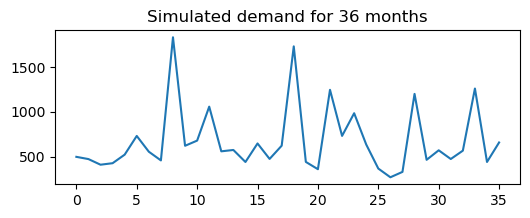

In [19]:
# Test code (Your graph probably looks different because of randomness)
import pandas as pd
import matplotlib.pyplot as plt
pd.Series(simulateDemand(36)).plot(title='Simulated demand for 36 months',figsize=(6,2))
plt.show()

In [21]:
## C - Q2. Inventory Management with Perishable Items (8 points)
## Need to check the s_inventory & expired part.
## Check the variables' names and how to use the min function.

In [23]:
demand = [30, 40, 20, 100, 120]
z = 100

basestock = z
inventory = basestock
restock_list = []
expired = 0

print('Month\tDiscarded\tInventory\tDemand\tFulfilled\tLost Sales\tEnd Inventory\tUnit Ordered')

months = range(len(demand))

restock_list = []
discard_list = []
lost_list = []

for month in months:
    monthly_demand = demand[month]
    
    # Define starting inventory.
    if month < 2:
        s_inventory = inventory
        expired = 0
    else: # month >= 2
        s_inventory = min(restock_list[month-1]+restock_list[month-2], inventory)
        expired = z - s_inventory
    # Keep track of expired items through discard_list
    discard_list.append(expired) 

    # Check how many items will be sold.
    monthly_sold = min(s_inventory, monthly_demand)
    lost_sales = max(0, monthly_demand - s_inventory)
    # Keep track of lost sales items through lost_list
    lost_list.append(lost_sales)

    # Calculate the end inventory before restocking.
    e_inventory = s_inventory - monthly_sold

    # Restock.
    if e_inventory < z:
        restock = z - e_inventory
    else: # e_inventory >= z
        restock = 0
    # Keep track of restocked items through restock_list
    restock_list.append(restock)

    # Check if the inventory is z.
    inventory = e_inventory + restock

    print(f'{month}\t{expired}\t\t{s_inventory}\t\t{monthly_demand}\t{monthly_sold}\t\t{lost_sales}\t\t{e_inventory}\t\t{restock}')

print(f'totalLost: {sum(lost_list)}')
print(f'totalDiscarded: {sum(discard_list)}')

Month	Discarded	Inventory	Demand	Fulfilled	Lost Sales	End Inventory	Unit Ordered
0	0		100		30	30		0		70		30
1	0		100		40	40		0		60		40
2	30		70		20	20		0		50		50
3	10		90		100	90		10		0		100
4	0		100		120	100		20		0		100
totalLost: 30
totalDiscarded: 40


In [25]:
def simulateSupply(demand,z):
    basestock = z
    inventory = basestock
    
    discard_list = []
    lost_list = []
    restock_list = []
        
    months = range(len(demand))
    
    for month in months:
        monthly_demand = demand[month]
        
        # Define starting inventory.
        if month < 2:
            s_inventory = inventory
            expired = 0
        else: # month >= 2
            s_inventory = min(restock_list[month-1]+restock_list[month-2], inventory)
            expired = z - s_inventory
        # Keep track of expired items through discard_list
        discard_list.append(expired) 
    
        # Check how many items will be sold.
        monthly_sold = min(s_inventory, monthly_demand)
        lost_sales = max(0, monthly_demand - s_inventory)
        # Keep track of lost sales items through lost_list
        lost_list.append(lost_sales)
    
        # Calculate the end inventory before restocking.
        e_inventory = s_inventory - monthly_sold
    
        # Restock.
        if e_inventory < z:
            restock = z - e_inventory
        else: # e_inventory >= z
            restock = 0
        # Keep track of restocked items through restock_list
        restock_list.append(restock)
    
        # Check if the inventory is z.
        inventory = e_inventory + restock

    totalLost = sum(lost_list)
    totalDiscarded = sum(discard_list)
    
    return totalLost, totalDiscarded

In [27]:
# Sample run 
totalLost,totalDiscarded=simulateSupply([30,40,20,100,120],100)
print(f'totalLost={totalLost} totalDiscarded={totalDiscarded}')

# Output should be: totalLost=30 totalDiscarded=40

totalLost=30 totalDiscarded=40


In [29]:
## C - Q3: Simulating Severity of Symptoms (9 points)
## Need to check: list_last_index != len(list)

This question asks you to simulate the distribution of symptoms for patients at a given hospital infected with a certain virus.

Suppose that for each new patient who arrives at a hospital with the virus, the future severities of the patient’s symptoms are independently drawn according to the following distribution: with probability 0.8, the patient has Non-Critical symptoms for two weeks, then is discharged from the hospital; with probability 0.15, the patient is Non-Critical for one week, then Critical for one week, then Non-Critical for the last week, and then discharged; with probability 0.05, the patient is Critical for two weeks, then Non-Critical for two weeks, and then discharged.


For example, a patient who arrives in Week 0 may be Non-Critical in Week 0 and Week 1, and discharged at the end of Week 1. Another possibility is that the patient is Non-Critical in Week 0, Critical in Week 1, and Non-Critical in Week 2, and discharged at the end of Week 2. The final possibility is that the patient is Critical in Week 0 and 1, and Non-Critical in Week 2 and 3, and discharged at the end of Week 3.

Write a function called “simulateSymptoms” with two input parameters:
- arrivalsList: a list corresponding to the number of new patients who arrive at the hospital each week with the virus. Each number in the list is a non-negative integer.
- weeks: a positive integer corresponding to the number of weeks to simulate. You may assume that this number is greater than or equal to the length of the arrivalsList. When it is strictly greater than the length of the arrivalsList, then assume that there are no more arrivals in the weeks that are not contained in the arrivalsList.

The function should return two lists, each of length equal to the input parameter “weeks”:
- critical: a list corresponding to the number of patients exhibiting Critical symptoms in each week.
- nonCritical: a list corresponding to the number of patients exhibiting Non-Critical symptoms each week.

In [48]:
# My code: Best

from numpy.random import default_rng
rng = default_rng()

def simulateSymptoms(arrivalsList, weeks):
    critical = [0] * weeks
    nonCritical = [0] * weeks
    weeks_list = range(weeks)
    weeks_list_last_index = weeks - 1
    arrivalsList_last_index = len(arrivalsList) - 1
    
    for week in weeks_list:
        if week > arrivalsList_last_index:
            arrivals = 0
        else:
            arrivals = arrivalsList[week]

        for arrival in range(arrivals):
            check_symptom = rng.choice(['Group A', 'Group B', 'Group C'], p=[0.8, 0.15, 0.05])
            
            if check_symptom == 'Group A':
                if week <= weeks_list_last_index:
                    nonCritical[week] += 1
                if week + 1 <= weeks_list_last_index:
                    nonCritical[week + 1] += 1
            
            elif check_symptom == 'Group B':
                if week <= weeks_list_last_index:
                    nonCritical[week] += 1
                if week + 1 <= weeks_list_last_index:
                    critical[week + 1] += 1
                if week + 2 <= weeks_list_last_index:
                    nonCritical[week + 2] += 1
            
            else: # Group C
                if week <= weeks_list_last_index:
                    critical[week] += 1
                if week + 1 <= weeks_list_last_index:
                    critical[week + 1] += 1
                if week + 2 <= weeks_list_last_index:
                    nonCritical[week + 2] += 1
                if week + 3 <= weeks_list_last_index:
                    nonCritical[week + 3] += 1

    return critical, nonCritical

In [40]:
# Solution

from numpy.random import default_rng
def simulateSymptoms(arrivalsList,weeks):
    rng=default_rng()
    critical=[0 for i in range(weeks+3)]
    nonCritical=[0 for i in range(weeks+3)]
    w=0
    for arrivals in arrivalsList:
        for i in range(arrivals):
            severity=rng.choice(['mild','developing','acute'],p=[0.8,0.15,0.05])
            if severity=='mild':
                nonCritical[w]+=1
                nonCritical[w+1]+=1
            elif severity=='developing':
                nonCritical[w]+=1
                critical[w+1]+=1
                nonCritical[w+2]+=1
            else:
                critical[w]+=1
                critical[w+1]+=1
                nonCritical[w+2]+=1
                nonCritical[w+3]+=1
        w+=1
    return critical[:weeks],nonCritical[:weeks]

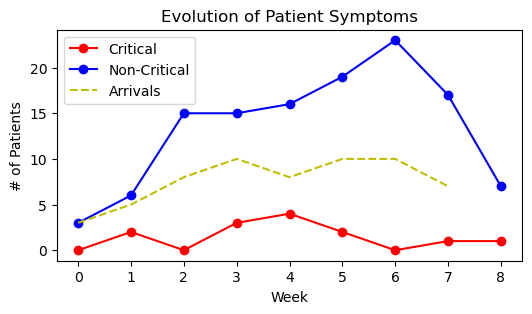

In [46]:
# Sample run
arrivalsList=[3,5,8,10,8,10,10,7]
weeks=9

critical,nonCritical=simulateSymptoms(arrivalsList,weeks)
import matplotlib.pyplot as plt
plt.figure(figsize=(6,3))
plt.plot(range(weeks),critical,'ro-',label='Critical')
plt.plot(range(weeks),nonCritical,'bo-',label='Non-Critical')
plt.plot(range(len(arrivalsList)),arrivalsList,'y--',label='Arrivals')
plt.legend()
plt.title('Evolution of Patient Symptoms')
plt.ylabel('# of Patients')
plt.xlabel("Week")
plt.show()